In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('../resources/messi.jpg')

## Thresholding
A simple segmentation method used to separate out regions of an image corresponding to objects we want to analyze.
### Simple Thresholding
If a pxel value is greater than a threshold, it is assigned one value (maybe white), else  another value (maybe black).

Function: <b>`cv2.threshold(image, threshold_value, max_value, thresholding_type)`</b>

<u>Types of thresholding</u>:
1. <b>cv2.THRESH_BINARY</b> - If pixel value above threshold, it is assigned max_value, else 0. (default flag)
2. <b>cv2.THRESH_BINARY_INV</b> - Opposite of cv2.THRESH_BINARY. Pixel value above threshold is assigned 0 and vice-versa.
3. <b>cv2.THRESH_TRUNC</b> - Pixel values above threshold are truncated to threshold value.
4. <b>cv2.THRESH_TOZERO</b> - If pixel value above threshold, remains unchanges. Otherwise, set to 0.
5. <b>cv2.THRESH_TOZERO_INV</b> - Opposite of cv2.THRESH_TOZERO. If pixel value is above threshold, will be set to 0.

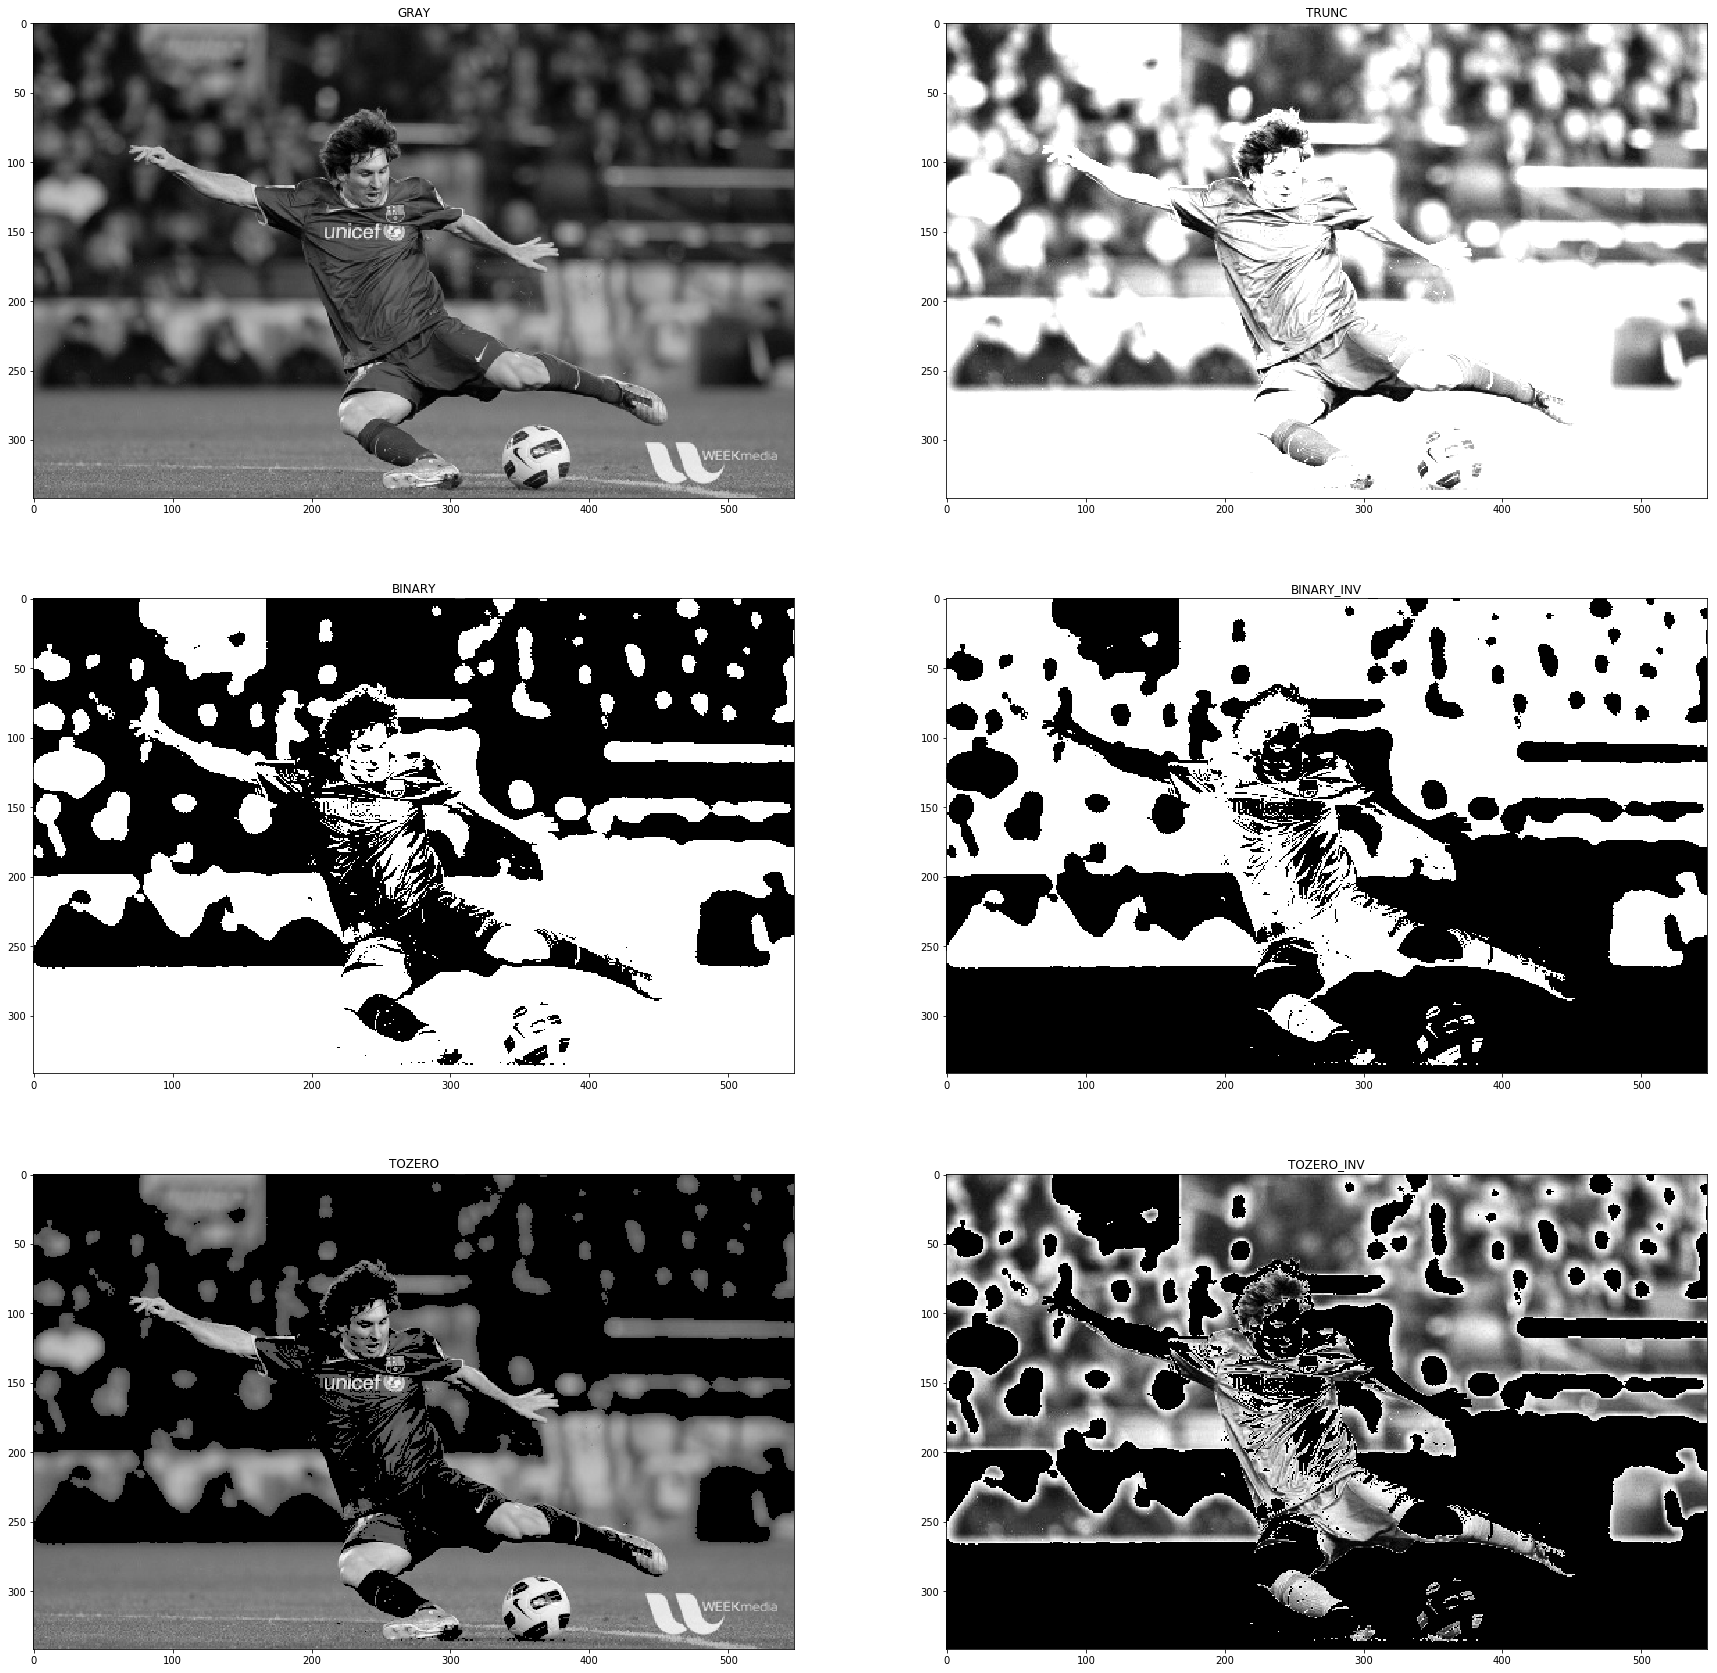

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh1 = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)[1]
thresh2 = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)[1]
thresh3 = cv2.threshold(gray, 80, 255, cv2.THRESH_TRUNC)[1]
thresh4 = cv2.threshold(gray, 80, 255, cv2.THRESH_TOZERO)[1]
thresh5 = cv2.threshold(gray, 80, 255, cv2.THRESH_TOZERO_INV)[1]

titles = ['GRAY', 'TRUNC', 'BINARY', 'BINARY_INV', 'TOZERO', 'TOZERO_INV']
plots = [gray, thresh3, thresh1, thresh2, thresh4, thresh5]

fig = plt.figure()
fig.set_size_inches(30, 30)

for i in range(6):
    fig.add_subplot(3, 2, i+1)
    plt.imshow(plots[i], cmap='gray')
    plt.title(titles[i])

plt.show()

### Adaptive Thresholding
Rather than applying same threshold value across the image, threshold value at each pixel location is calculated depending on the neighbouring pixel intensities.

Function: <b>`cv2.adaptiveThreshold(image, max_value, adaptive_method, threshold_type, block_size, C)`</b>

<u>Adaptive Methods</u>:
1. <b>cv2.ADAPTIVE_THRESH_MEAN_C</b> - threshold is mean of neighbourhood area
2. <b>cv2.ADAPTIVE_THRESH_GAUSSIAN_C</b> - threshold is weighted sum of neighbourhood area

<b>Block Size</b> - Size of neighbourhood area

<b>C</b> - A constant subtracted from threshold calculated

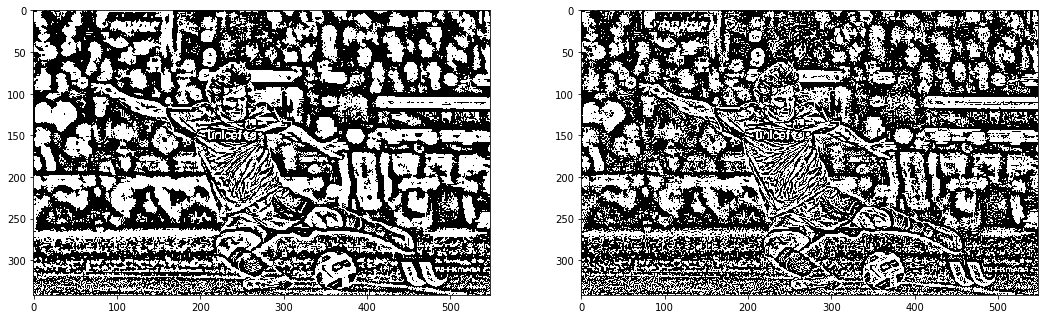

In [3]:
mean_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 0)
gaussian_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 0)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(mean_thresh, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(gaussian_thresh, cmap='gray')

plt.show()

### Otsu's Thresholding
Automatically calculates threshold value from a bimodal image. (Accurate only for bimodal images)

Calculated threshold: 86.000000


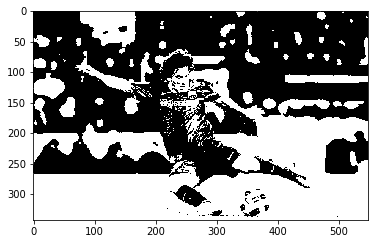

In [4]:
thresh_selected, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print "Calculated threshold: %f" % (thresh_selected)

plt.imshow(otsu_thresh, cmap='gray')
plt.show()